In [208]:
import numpy as np
import pandas as pd

In [209]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [210]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
754,ham,Realy sorry-i don't recognise this number and ...,NaN,NaN,NaN
1863,ham,I'll let you know when it kicks in,NaN,NaN,NaN
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...,NaN,NaN,NaN
821,ham,On the road so cant txt,NaN,NaN,NaN
4277,ham,I've reached home finally...,NaN,NaN,NaN


In [211]:
df.shape

(5572, 5)

In [212]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [214]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [215]:
df.sample(5)

,v1,v2
3575,ham,The sign of maturity is not when we start sayi...
4417,ham,"When you get free, call me"
2634,ham,"Sorry da thangam, very very sorry i am held up..."
139,ham,Got c... I lazy to type... I forgot Ì_ in lect...
1187,ham,There's no point hangin on to mr not right if ...


In [216]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4596,ham,Full heat pa:-) i have applyed oil pa.
814,spam,U were outbid by simonwatson5120 on the Shinco...
2345,ham,"Hi this is yijue, can i meet u at 11 tmr?"
2703,ham,Yup no more already... Thanx 4 printing n hand...
1044,spam,We know someone who you know that fancies you....


In [217]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [218]:
df['target'] = encoder.fit_transform(df['target'])

In [219]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [220]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [221]:
# check for duplicate values
df.duplicated().sum()

403

In [222]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [223]:
df.duplicated().sum()

0

In [224]:
df.shape

(5169, 2)

## 2.EDA

In [225]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [226]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

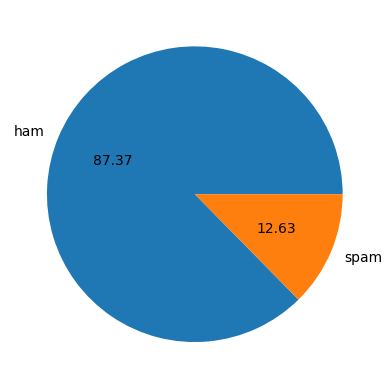

In [227]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [228]:
# Data is imbalanced

In [229]:
import nltk

In [230]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [231]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nilanchala
[nltk_data]     Panda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [232]:
df['num_characters'] = df['text'].apply(len)

In [233]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [234]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [235]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [236]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [237]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [238]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [239]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [240]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [241]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

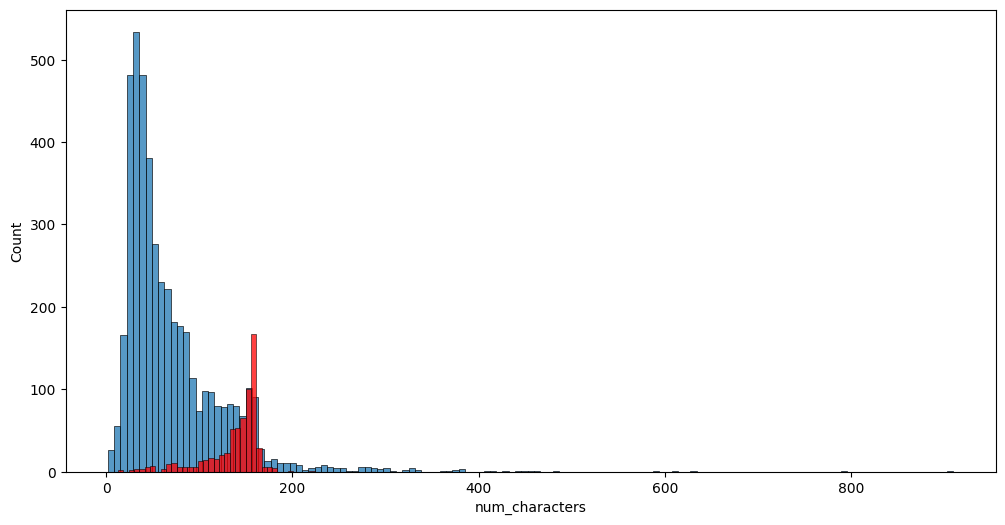

In [242]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

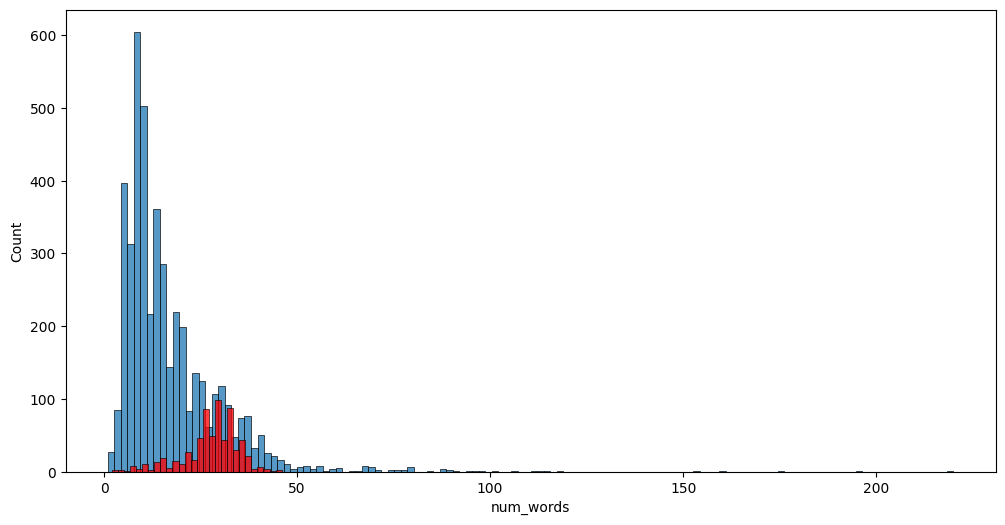

In [243]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

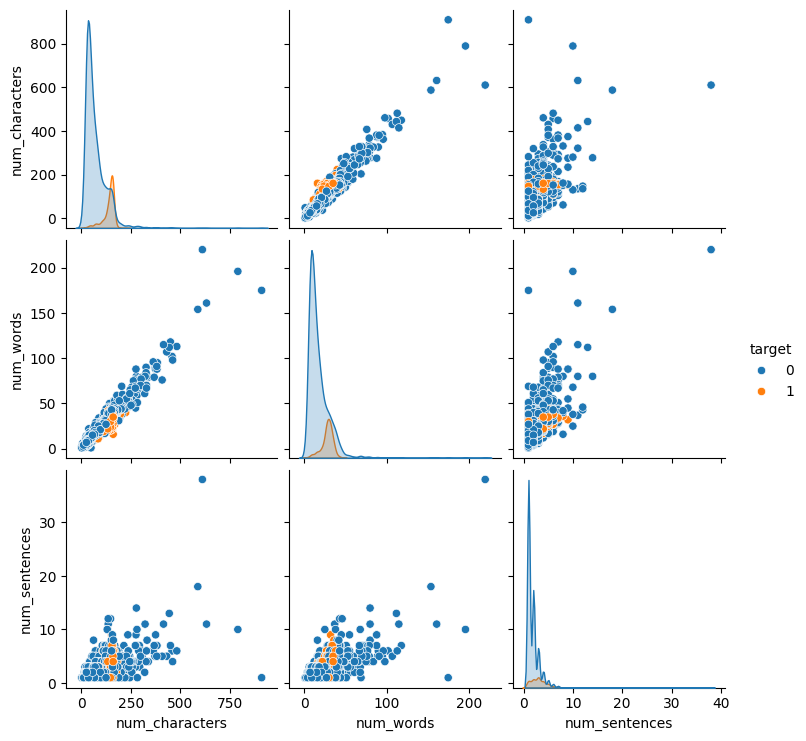

In [244]:
sns.pairplot(df,hue='target')

<Axes: >

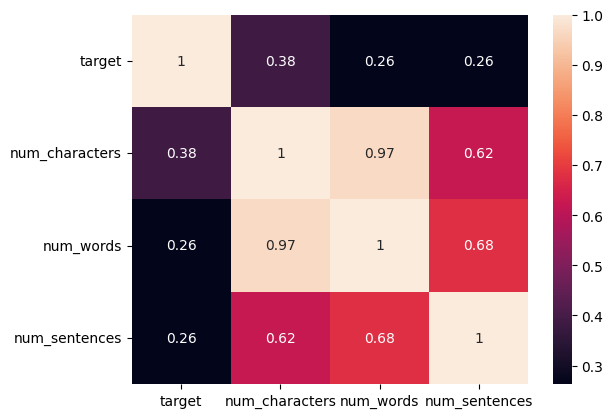

In [245]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [246]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [247]:
# import string
# from nltk.corpus import stopwords


In [248]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nilanchala
[nltk_data]     Panda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [249]:
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    y = []
    text = nltk.word_tokenize(text.lower())  # Tokenize the text
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"i 'm gon na be home soon and i do n't want to talk about thi stuff anymor tonight , k ? i 've cri enough today ."

In [250]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [251]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [252]:
df['transformed_text'] = df['text'].apply(transform_text)

In [253]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point , crazi .. avail onli in..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i do n't think he goe to usf , he live aro..."


In [254]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [256]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

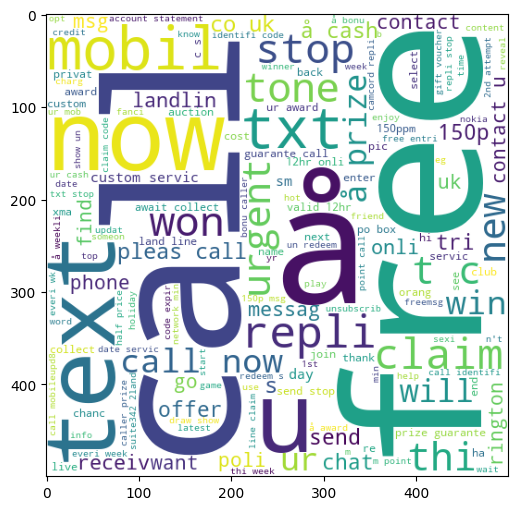

In [257]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [258]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

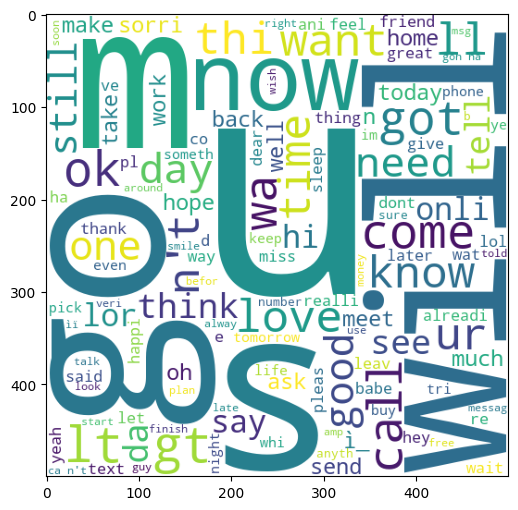

In [259]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [260]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point , crazi .. avail onli in..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i do n't think he goe to usf , he live aro..."


In [261]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [262]:
len(spam_corpus)

17983

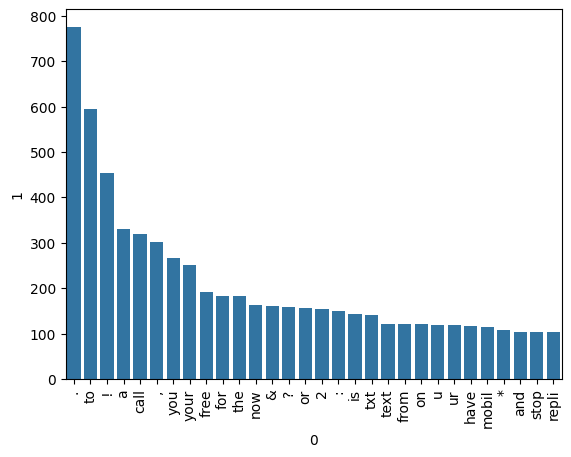

In [263]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

word_counts_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plotting the barplot
sns.barplot(x=word_counts_df[0], y=word_counts_df[1])
plt.xticks(rotation='vertical')
plt.show()


In [264]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [265]:
len(ham_corpus)

77261

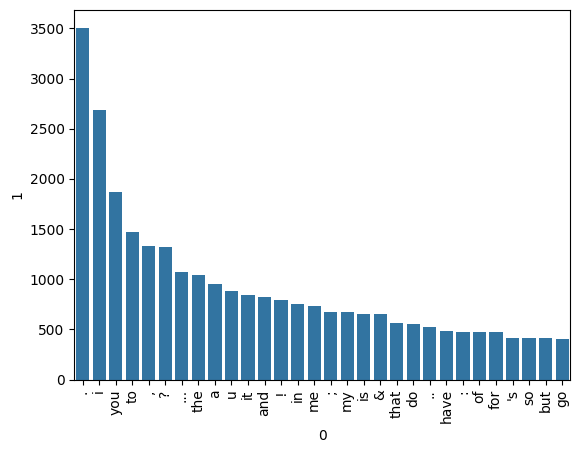

In [266]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

word_counts_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Plotting the barplot
sns.barplot(data=word_counts_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()


In [267]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point , crazi .. avail onli in..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i do n't think he goe to usf , he live aro..."


## 4. Model Building

In [268]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [269]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [270]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [271]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [272]:
X.shape

(5169, 3000)

In [273]:
y = df['target'].values

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [276]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [277]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [278]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8849129593810445
[[797  99]
 [ 20 118]]
0.543778801843318


In [279]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [280]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[893   3]
 [ 13 125]]
0.9765625


In [281]:
# tfidf --> MNB

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [283]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [284]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    # 'AdaBoost': abc, 
    # 'BgC': bc, 
    # 'ETC': etc,
    # 'GBDT':gbdt,
    # 'xgb':xgb
}

In [285]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [286]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9758064516129032)

In [287]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8695652173913043
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0


In [288]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [289]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.970986,1.000000
5,RF,0.978723,1.000000
0,SVC,0.980658,0.975806
4,LR,0.967118,0.948276
3,DT,0.932302,0.869565


In [290]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [291]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.978723
3,SVC,Accuracy,0.980658
4,LR,Accuracy,0.967118
5,DT,Accuracy,0.932302
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,1.000000
9,SVC,Precision,0.975806


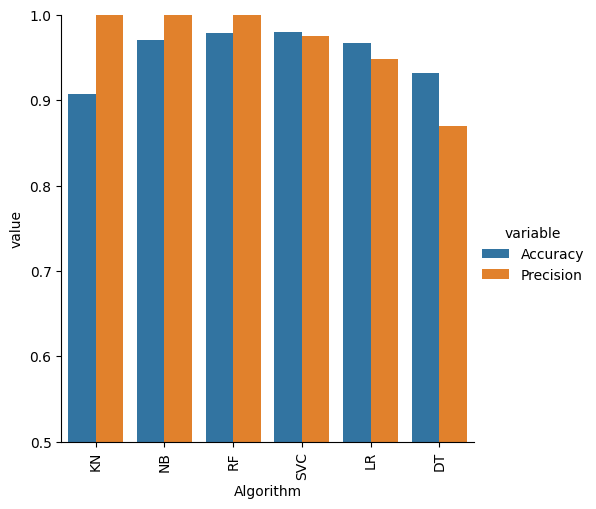

In [292]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [293]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [294]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [295]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [296]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [297]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [298]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [299]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
3,SVC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
4,LR,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
5,DT,0.932302,0.869565,0.932302,0.869565,0.932302,0.869565,0.932302,0.869565


In [300]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [301]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [302]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [303]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [304]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [305]:
from sklearn.ensemble import StackingClassifier

In [306]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [307]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9893617021276596
Precision 0.9774436090225563


In [308]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [309]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))